<a href="https://colab.research.google.com/github/chenboju/LLM/blob/main/6_keras_CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 匯入必要的庫
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# 創建一個序貫模型
model = Sequential()

# 添加卷積層（Convolutional Layer）
# - filters: 設定 64 個卷積核，每個卷積核可以學習圖像中的不同特徵
# - kernel_size: 卷積核的大小是 5x5
# - input_shape: 設定輸入圖像的形狀是 32x32，並且有 3 個通道（彩色圖像）
# - activation: 使用 ReLU 激活函數
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))

# 添加卷積層
# - 這一層繼續使用 64 個卷積核，kernel_size 和 activation 與上一層相同
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))

# 添加最大池化層（Max Pooling Layer）
# - pool_size: 池化窗口大小是 2x2，這將減小特徵圖的尺寸
model.add(MaxPooling2D(pool_size=(2, 2)))

# 添加卷積層
# - 使用 128 個卷積核
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# 添加卷積層
# - 繼續使用 128 個卷積核
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# 添加最大池化層
model.add(MaxPooling2D(pool_size=(2, 2)))

# 添加展平層
# - 這一層將二維特徵圖轉換為一維向量，以便連接到全連接層
model.add(Flatten())

# 添加全連接層（Dense Layer）
# - 這一層具有 10 個單元，用於多類別分類（10 個類別的分類）
# - activation: 使用 softmax 激活函數，將輸出轉換為概率分佈
model.add(Dense(10, activation='softmax'))

# 顯示模型摘要（summary），顯示模型的結構和參數數量
model.summary()

# 編譯模型
# - optimizer: 使用 'rmsprop' 優化器，一種常用的優化器
# - loss: 使用 'categorical_crossentropy' 作為損失函數，用於多類別分類問題
# - metrics: 設置評估指標為準確性（accuracy）
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         409728    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                   

In [ ]:
# 匯入必要的庫
cifar10 = keras.datasets.cifar10  # 匯入 CIFAR-10 數據集

# 載入數據集
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
# train_data: 訓練數據圖像, train_label: 訓練數據標籤
# test_data: 測試數據圖像, test_label: 測試數據標籤

# 將訓練標籤（train_label）保存到另一個變數（train_label_original）以便未來分析使用
train_label_original = train_label

# 將訓練標籤（train_label）和測試標籤（test_label）進行 one-hot 編碼
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)
# One-Hot Encoding 將數字標籤轉換成二進制形式，以便多類別分類

# 現在，train_label 和 test_label 包含了 one-hot 編碼的標籤，可以用於深度學習模型的訓練。


170498071/170498071 [==============================] - 3s 0us/step


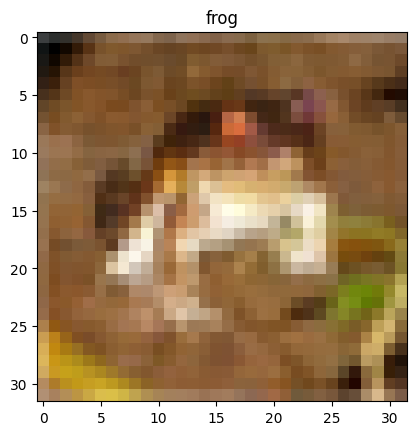

[6]


In [ ]:
import matplotlib.pyplot as plt

# 創建類別名稱列表，以便稍後顯示圖像的類別名稱
category = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 顯示訓練集中的第一個圖像
plt.imshow(train_data[0])
# 設定圖像的標題為對應的類別名稱，使用 train_label_original 中的原始標籤
plt.title(category[int(train_label_original[0])])
# 顯示圖像
plt.show()

# 打印圖像的原始標籤
print(train_label_original[0])


In [ ]:
train_history=model.fit(train_data,train_label,epochs=30,batch_size=512)


Epoch 1/30
98/98 [==============================] - 18s 51ms/step - loss: 10.5906 - accuracy: 0.1813
Epoch 2/30
98/98 [==============================] - 4s 41ms/step - loss: 2.2199 - accuracy: 0.2500
Epoch 3/30
98/98 [==============================] - 4s 40ms/step - loss: 1.9738 - accuracy: 0.3226
Epoch 4/30
98/98 [==============================] - 4s 40ms/step - loss: 1.7966 - accuracy: 0.3836
Epoch 5/30
98/98 [==============================] - 4s 41ms/step - loss: 1.6478 - accuracy: 0.4340
Epoch 6/30
98/98 [==============================] - 4s 40ms/step - loss: 1.4806 - accuracy: 0.4896
Epoch 7/30
98/98 [==============================] - 4s 40ms/step - loss: 1.3463 - accuracy: 0.5376
Epoch 8/30
98/98 [==============================] - 4s 41ms/step - loss: 1.2342 - accuracy: 0.5822
Epoch 9/30
98/98 [==============================] - 4s 41ms/step - loss: 1.1190 - accuracy: 0.6201
Epoch 10/30
98/98 [==============================] - 4s 41ms/step - loss: 0.9705 - accuracy: 0.6701
Epoch 1

In [ ]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 2s 5ms/step - loss: 3.7357 - accuracy: 0.5974
0.5974000096321106


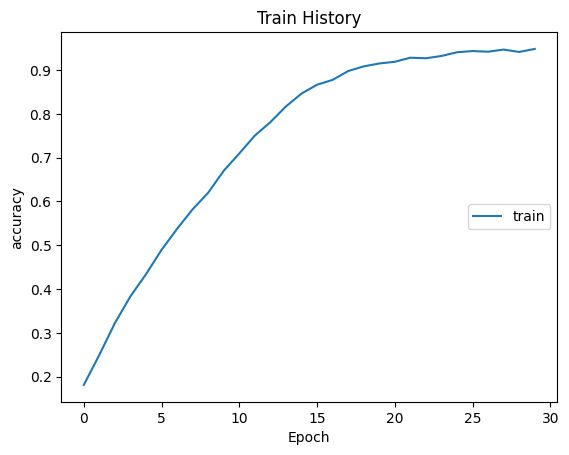

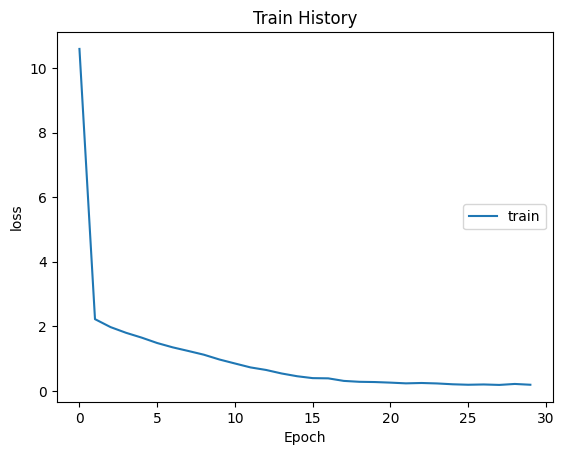

In [ ]:
#繪製正確性與損失歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')